
# Introducing R 
* How to use Jupyter Notebook in the Browser
* Why do we use R?

![](https://raw.githubusercontent.com/GC-alex/QM/master/figs/header_sized_small.jpg)

## What is R?

R is a programming language that is used for data analytics. It is primarily used in academics and research. Statistical models can be written with only a few lines of code and it has a **steep learning curve** - especially if you know the basics and are not afraid of experimenting with those.
It has an active community and a big code repository with implementable packages to make your coding life more easy and more divers.


In this course we will work with R in two ways: 

**1. Jupyter Notebook.** This is were you are currently at. This interactive Browser Page allows you to write your code, follow instructions and experiment a little with R as a programming language. Everything without installing, downloads or any other complicated setups.
With Juypter Notebook we will follow through the tutorial and in the lectures.

**2. Local R** For the exam project and for your scientifique future, you will work with R on your local drive. It is a little less intuitive but we will guide you through it in no time! Just check out our **00_Set up your local R** file for that!

---
## What is a programming language?

Just like a spoken language, programming languages follow certain rules:
* You need to write instructions (Code)
* There is syntax (Grammar) that you need to follow
* R then follows your code step by step


---
## The World of Geocomputation in R

In this session, we want to have a first impression on R's capabilities. This might help you get a feeling, of why R might be useful for you and why you'll regret not having known about it earlier.


### Vizualize Data
R is good at vizualizing your long tables of data. 
For this example, we take the `airquality` dataset. This dataset is already implemented in your R and consists of daily airquality measuresments in New York from May to September 1973.

Now simply type `plot(airquality)` in the box(cell) below and then press the little ![**Run** -button](https://raw.githubusercontent.com/GC-alex/QM/master/figs/01_run_button.png) on the top, or simply hit **Strg + Enter**.

Don't mind the `options` - we are using this to define the size of our outcome plot!


In [63]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 1000)




Easily you got an visual overview of your `airquality` data.
As you can see: we have different measurements. This plot shows us the broad overview of the relationship between those measurments. Do they correlate? Are they continous or discrete variables? This plot might at first be a little confusing, but don't worry we will get to it in the next sessions of this course.


You already used your first `function()`! A `function()` in R is always easily detectable by the `()` at the end. In those brackets you define how the function should work. In this case you use `plot()` on the data `airquality`.

Let's dig more into our data!
Try the following functions on our `airquality` data and figure out what they do:

`head()`
`summary()`

But wait! There seems to be a cell missing here! Add a new cell by using the **+** Button from the JupyterNotebook-Menue.


Compare the results from the `head()` function and our previous plot. As there were



So how about we actually just want to take a look at certain variables? With the`$` we can specify the different columns( here`Temp` and `Ozone`) in our data `airquality`.

`plot(airquality$Temp, airquality$Ozone)`

Check out the other measurments as well - can you already find some visual corellation between different measurments?

As you can see: with only a few lines of code, we already could dig a lot into our data and vizualize it as an first overview.
In only a few weeks from now, you will be able to do actual statistical analyzes, modeling and of course an even nicer way to present your data. 

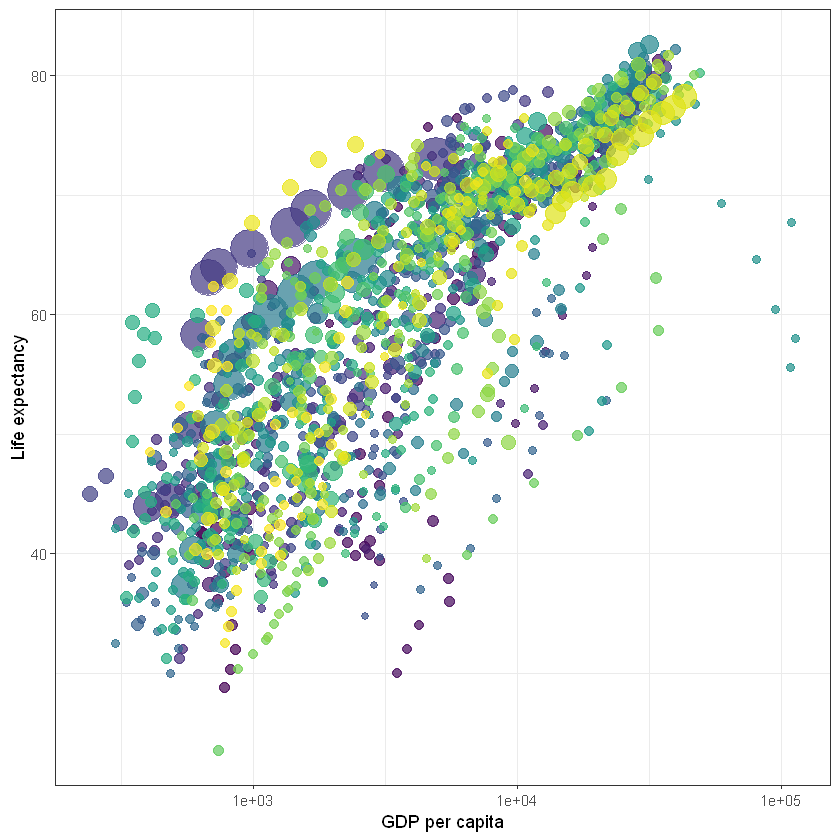

In [11]:
p <- ggplot(
  gapminder, 
  aes(x = gdpPercap, y=lifeExp, size = pop, colour = country)
  ) +
  geom_point(show.legend = FALSE, alpha = 0.7) +
  scale_color_viridis_d() +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  labs(x = "GDP per capita", y = "Life expectancy")
p

## Vizualize Spatial Data

As we are Geographers, spatial data is kind of "our thing". So don't worry: R doesn't leave us hanging in here! Again with a few simple lines, we can vizualize our spatial data. In this case we are using a world map and in blue, its countries borders. 


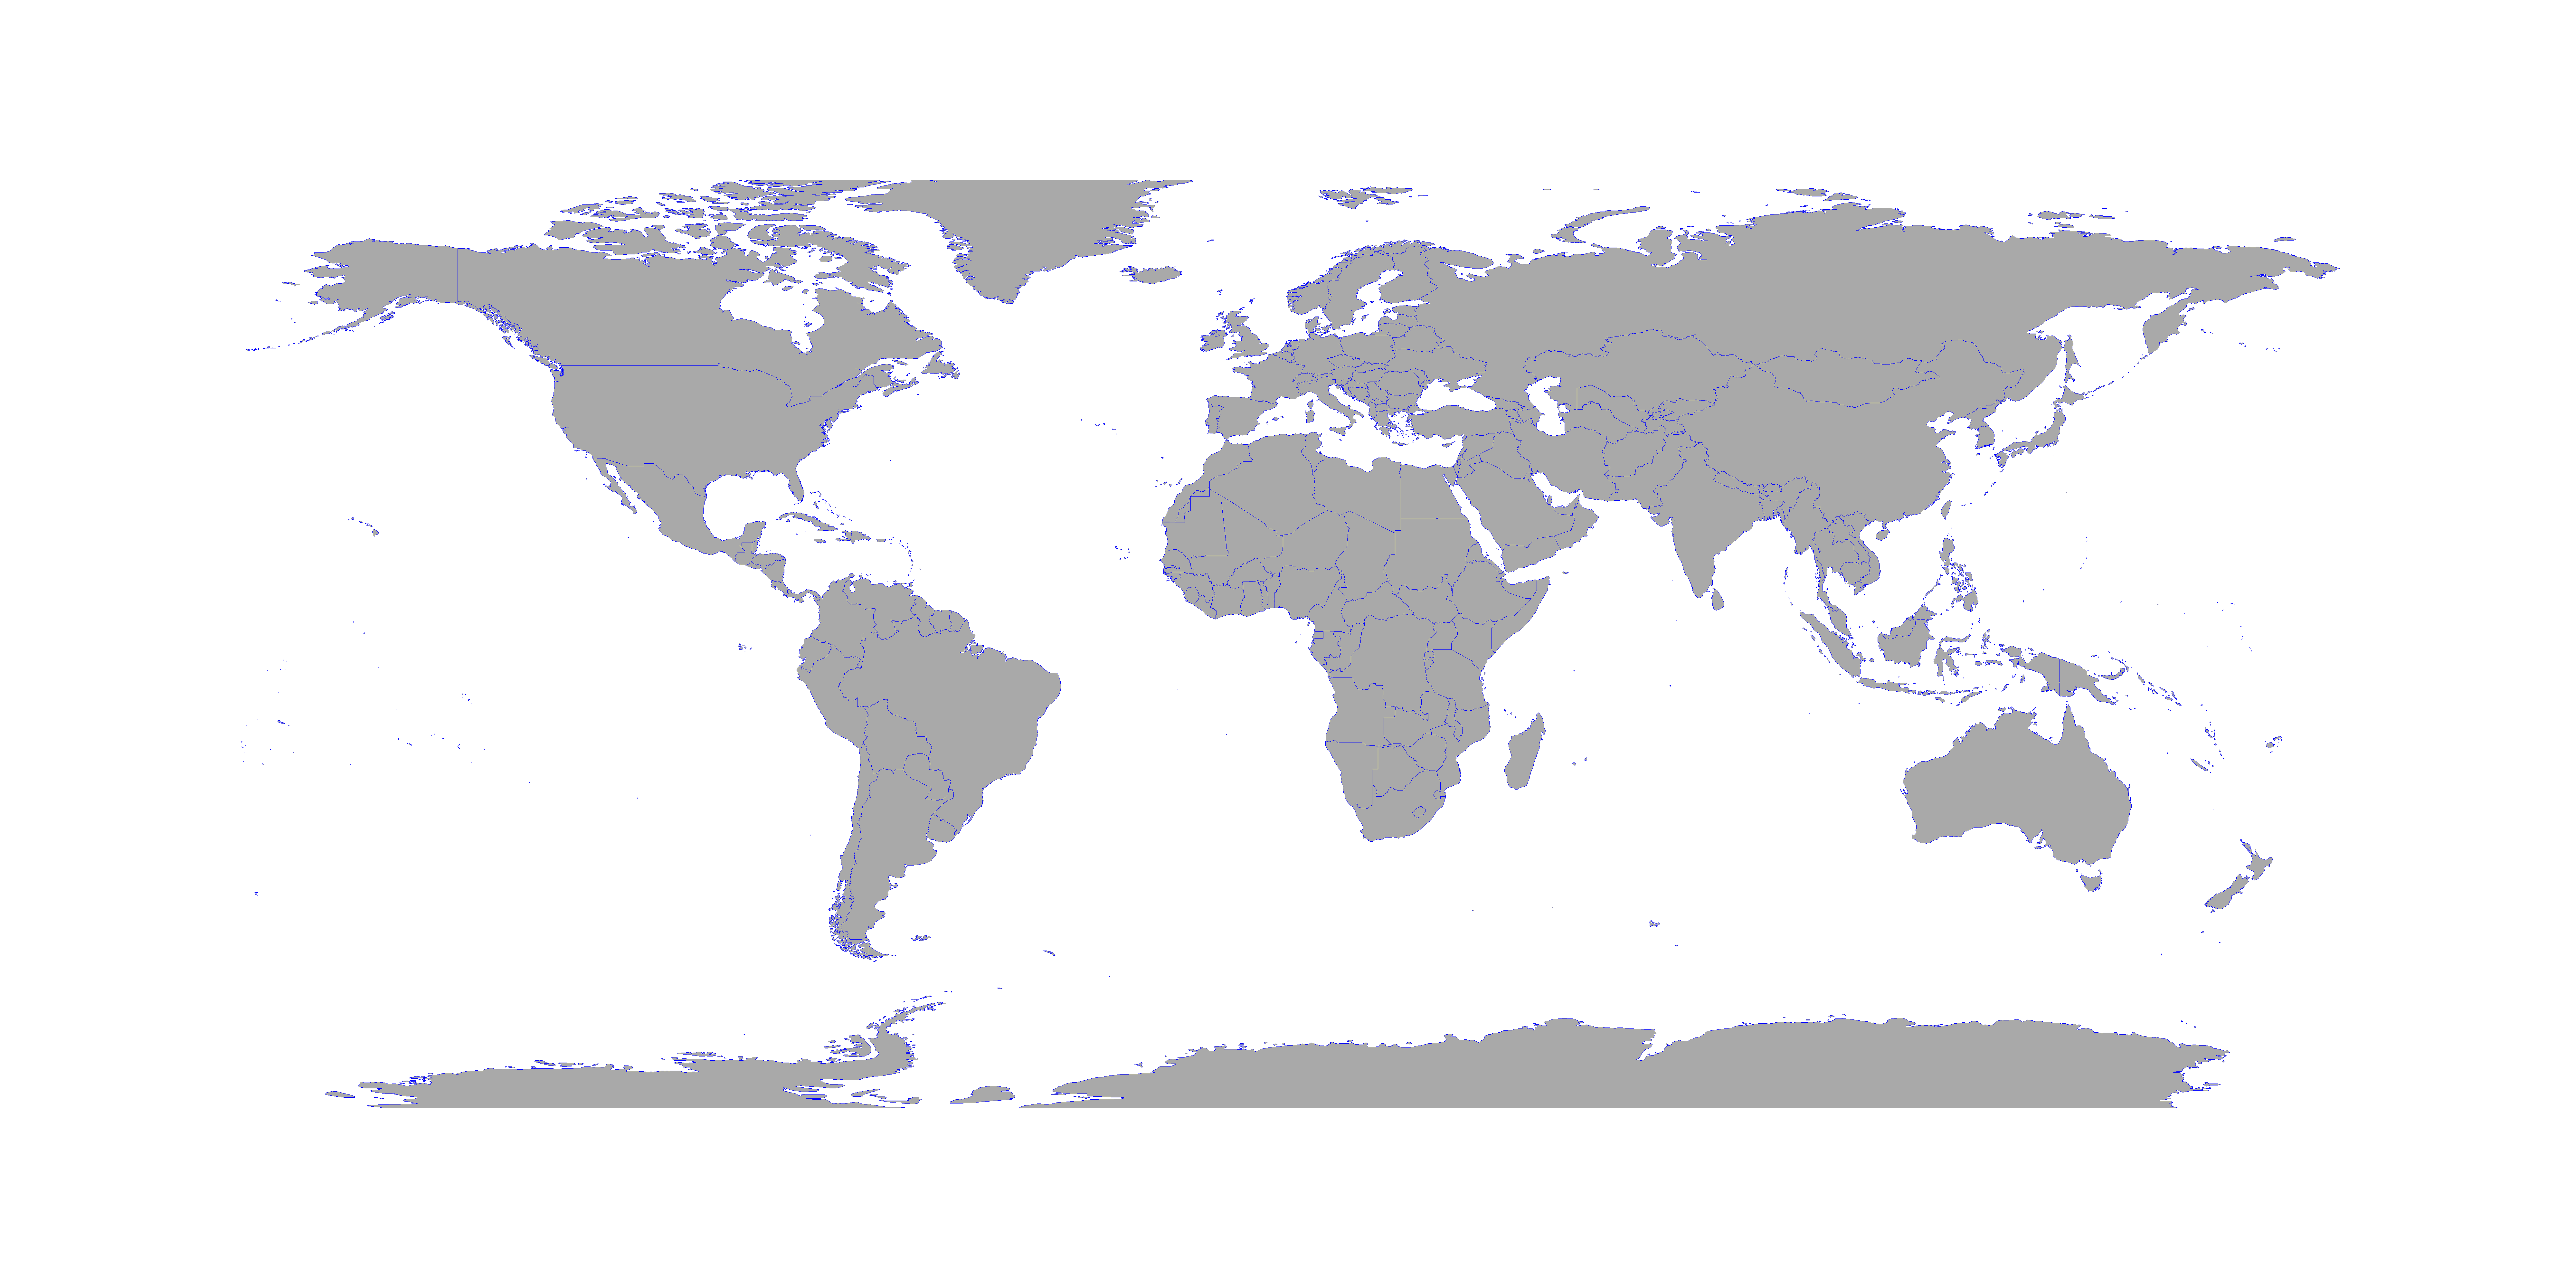

In [7]:
options(warn=-1)
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 1000)
library(maps)
map('world',col="darkgrey", fill=TRUE, bg="white", lwd=0.05, mar=rep(0,4),border=4, ylim=c(-80,80) )


We can create all different kind of maps. Here for example we are going for a connection map between different cities on the world. 

Do you see that R actually treats our worldmap like a globe and not just like an flat image?

---

**Note**

*Don't worry if you don't understand this code yet. It is meant to show you R's possibilities and not yet teach you every step of it. But you will get there in no time!*


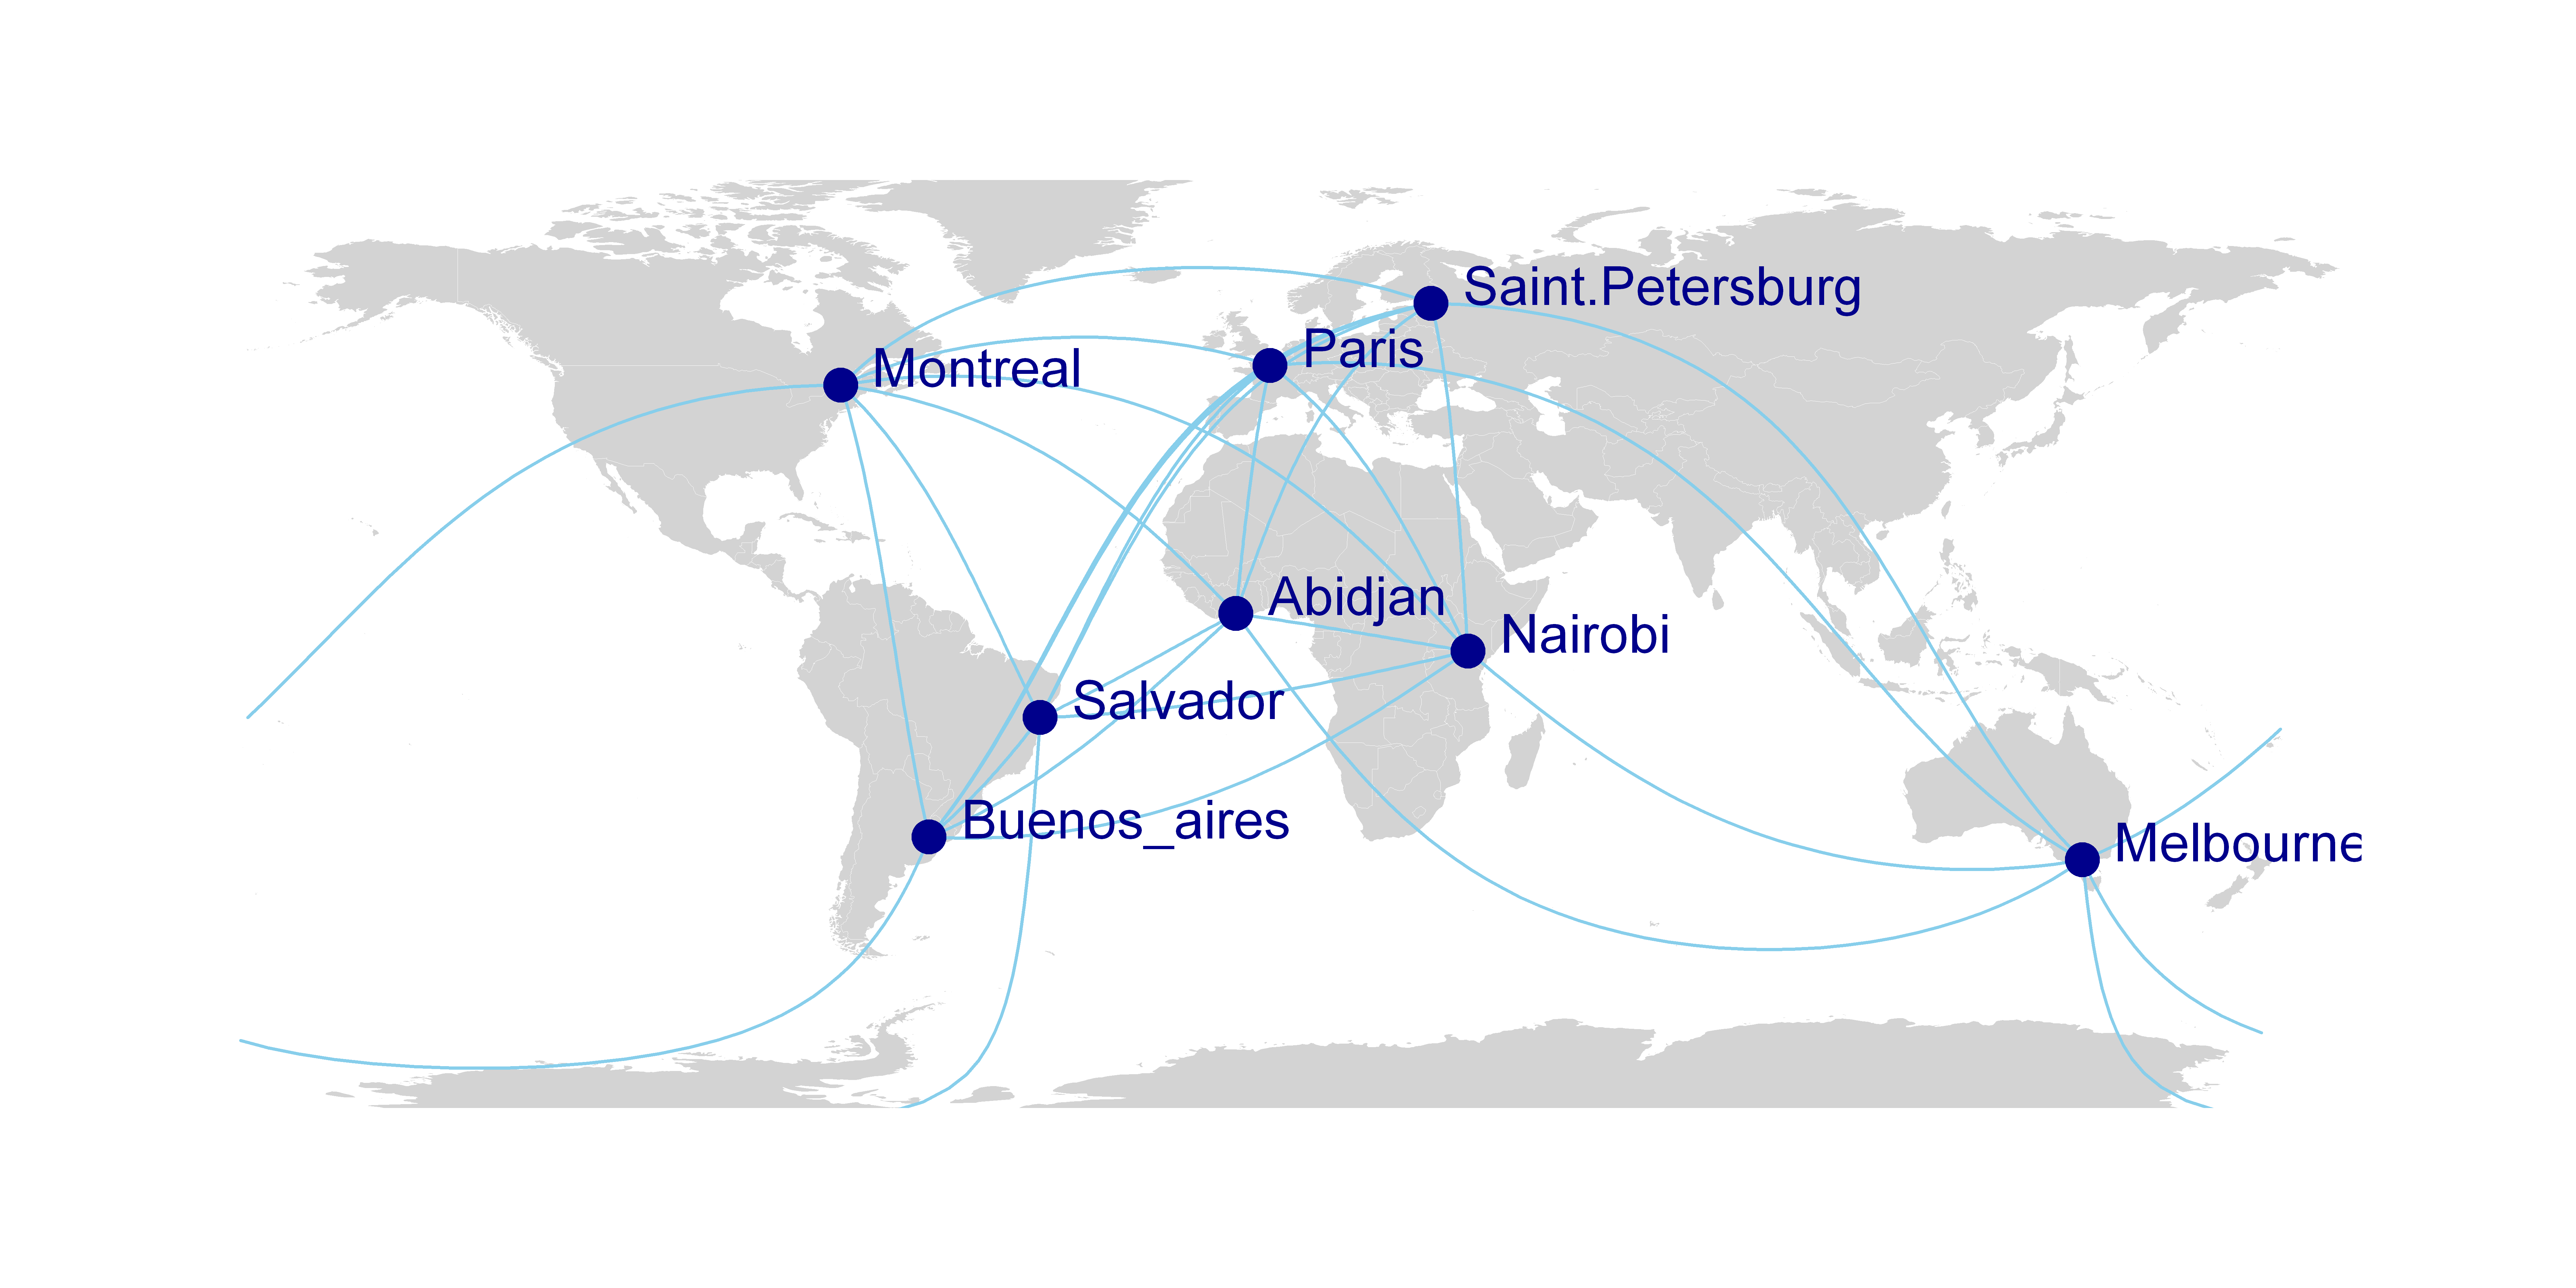

In [3]:
options(warn=-2)
library(dplyr)
library(geosphere)

options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 1000)

# write a function that allows us to compute connections between all cities (with using a globe as a base reference)
plot_my_connection=function( dep_lon, dep_lat, arr_lon, arr_lat, ...){
    inter <- gcIntermediate(c(dep_lon, dep_lat), c(arr_lon, arr_lat), n=50, addStartEnd=TRUE, breakAtDateLine=F)             
    inter=data.frame(inter)
    diff_of_lon=abs(dep_lon) + abs(arr_lon)
    if(diff_of_lon > 180){
        lines(subset(inter, lon>=0), ...)
        lines(subset(inter, lon<0), ...)
    }else{
        lines(inter, ...)
        }
    }

data <- rbind(
    Buenos_aires=c(-58,-34),
    Paris=c(2,49),
    Melbourne=c(145,-38),
    Saint.Petersburg=c(30.32, 59.93),
    Abidjan=c(-4.03, 5.33),
    Montreal=c(-73.57, 45.52),
    Nairobi=c(36.82, -1.29),
    Salvador=c(-38.5, -12.97)
    )  %>% as.data.frame()
colnames(data)=c("long","lat")

# Generate pairs of coordniates for the connections
all_pairs <- cbind(t(combn(data$long, 2)), t(combn(data$lat, 2))) %>% as.data.frame()
colnames(all_pairs) <- c("long1","long2","lat1","lat2")

# background world map
par(mar=c(0,0,0,0))
map('world',col="lightgrey", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )

# add city connections:
for(i in 1:nrow(all_pairs)){
    plot_my_connection(all_pairs$long1[i], all_pairs$lat1[i], all_pairs$long2[i], all_pairs$lat2[i], col="skyblue", lwd=1)
    }
 
# add points and names of cities
points(x=data$long, y=data$lat, col="darkblue", cex=2, pch=20)
text(rownames(data), x=data$long, y=data$lat,  col="darkblue", cex=1, pos=4)


One of the major uses of R is statistical modeling, for example in remote sensing.
This map was created in a bachelors thesis and has satellite imagery and an R code as its basis. 
![](https://raw.githubusercontent.com/GC-alex/QM/master/figs/Q20200427_river_klein.png)

---

**Note**

*Some cool thing about R: you can create image files such as .jpg or .png but also .html files to store your results!*